In [1]:
!pip3 install -r requirements.txt

# Project 2 AI Chat Notebook

In this notebook, we want to see the code you use to solve
the machine learning tasks below.  Additionally, for the supervised section, we will want to see an image of a graph representing 
the training times and accuracy of supervised models.

When run, this notebook should first run the unsupervised learning algorithm, and then the supervised algorithm.


# Unsupervised Learning

In this section, we will use the data set as a whole and classify the code using the unsupervised K-means clustering algorithm.
Use the imports below.
 

In [2]:
import glob

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


- Load all data files matching 'data/datasets/train-00000-5k-*.parquet'.
- Merge those dataframes into a single dataframe "df".

In [3]:
# Find all data files matching the pattern
files = glob.glob('data/datasets/train-00000-5k-*.parquet')

# Load all data files into a list of dataframes
dfs = [pd.read_parquet(file) for file in files]

# Merge all dataframes into a single dataframe
df = pd.concat(dfs, ignore_index=True)

# Display the merged dataframe
print(df.head())

                                                code             repo_name  \
0  #!/usr/bin/perl\n\nuse warnings;\nuse strict;\...        MASmedios/koha   
1  /* Implementation of the BSD usleep function u...    Chilledheart/glibc   
2  {% extends "allianceauth/base.html" %}\n{% loa...  R4stl1n/allianceauth   
3  #include <config.h>\n\n#include "testutils.h"\...   ethernetdan/libvirt   
4  /* Install given floating-point environment.\n...    Chilledheart/glibc   

                                                path language  license  size  
0                        patroncards/image-manage.pl     Perl  gpl-2.0  6701  
1                             sysdeps/posix/usleep.c        C  gpl-2.0  1316  
2  allianceauth/services/modules/openfire/templat...     HTML  gpl-2.0  1217  
3                            tests/openvzutilstest.c        C  gpl-2.0  4363  
4                        sysdeps/i386/fpu/fesetenv.c        C  gpl-2.0  3996  


- Define the code snippets (from data frames's "code" attribute)
- Define labels (from dataframe's "language" attribute)

In [5]:
# Define the code snippets
code_snippets = df['code'].tolist()

# Define the labels from the dataframe
labels = df['language'].tolist()

- Convert code snippets to TF-IDF features

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the code snippets to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(code_snippets)

- Perform K-Means clustering

In [12]:
from sklearn.cluster import KMeans

# Perform K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=8, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_features)

# Display the cluster labels
print(cluster_labels)


[2 4 1 ... 4 5 2]


- Print the cluster assignments with each cluster being truncated to 80 characters long.


In [13]:
# Print 10 sample code snippets truncated to 80 characters for each identified cluster
for cluster_num in range(8):
    cluster_indices = cluster_labels == cluster_num
    cluster_snippets = [snippet.replace('\n', ' ')[:80] + '...' if len(snippet.replace('\n', ' ')) > 80 else snippet.replace('\n', ' ') for snippet in df.loc[cluster_indices, 'code'].head(10)]
    
    print(f"Sample Code Snippets for Cluster {cluster_num}:")
    for snippet in cluster_snippets:
        print(snippet)
    print()



Sample Code Snippets for Cluster 0:
/*  * Copyright 2008 ZXing authors  *  * Licensed under the Apache License, Vers...
<?php /*  * Copyright 2014 Google Inc.  *  * Licensed under the Apache License, ...
  * Copyright 2005-2007 L...nents 7.3 License.
/**  * JBoss, Home of Professional Open Source.  * Copyright 2014 Red Hat, Inc.,...
/**  * Licensed to the Apache Software Foundation (ASF) under one or more  * con...
--- license: >     Licensed to the Apache Software Foundation (ASF) under one   ...
/**  * Licensed to the Apache Software Foundation (ASF) under one or more  * con...
# Copyright 1999-2010 University of Chicago #  # Licensed under the Apache Licen...
/*  * Licensed to the Apache Software Foundation (ASF) under one or more  * cont...
/*  *  * Copyright 2015 gRPC authors.  *  * Licensed under the Apache License, V...

Sample Code Snippets for Cluster 1:
{% extends "allianceauth/base.html" %} {% load bootstrap %} {% load staticfiles ...
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 

## TODO: Unsupervised Learning Cluster Explanation

- This should be an English paragraph statement declaring how you assessed the quality/meaning of the clusters.
This should be simply explaining how you think each cluster is formed/defined.

I think clusters have been formed by identifying the syntax of the code and trying to place similar code in the same cluster. Cluster 0 has code snippets that are related to PHP. Since I am not familiar with PHP, I'm aware of the syntax and as most of the samples only show comments, I can't be sure. Cluster 1 has code related to HTML which is clear from the tags. Cluster 2 seems to contain a mix of PHP and Perl. Cluster 3 contains code snippets related to Python as I can see Django being used. Cluster 4 contains code snippets related to Java evident from its comment syntax. Cluster 5 also seems like Java code. Cluster 6 contains code snippets related to C. Cluster 7 contains code snippets related to Ruby. 

# Supervised Learning

Write a python script that loads successively larger data files and merges them into larger training sets.
For each training set, let's track training time, prediction time, and accuracy.
Use the imports below.

In [48]:
import glob
import time

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


- Track measurements for each round: the round number/index, how long in seconds the train, predict steps take, and an accuracy report
- Use a list of dictionaries for measurement storage, with "round", "train", "predict", "accuracy" as keys

In [49]:
# Initialize list to store measurements
measurements = []

# Function to track measurements for each round
def track_measurements(round_num, train_time, predict_steps, accuracy):
    measurement = {
        "round": round_num,
        "train": train_time,
        "predict": predict_steps,
        "accuracy": accuracy
    }
    measurements.append(measurement)


- Write a function named learn that takes a dataframe and an index as parameters.
- The index indicates the round number of learning. The function should:
- 1. Create a dictionary to store the measurements for this round
- 2. Print a message indicating the round number
- 3. Store the round number in the dictionary under 'round'
- 4. Split the dataframe into code snippets and labels
- 5. Split the code snippets and labels into training and test sets
- 6. Create a TF-IDF vectorizer
- 7. Use the 'fit_transform' method on the training data to learn the vocabulary and idf, and return term-document matrix.
- 8. Use the 'transform' method on the test data to transform documents to document-term matrix.
- 9. Create a Support Vector Machine classifier
- 10. Train the classifier using the training data
- 11. Save the model to a file and load it back from a file (to make sure it works)
- 12. Use the classifier to predict the labels for the test data
- 13. Print the classification report which should be a dictionary
- 14. Store the training time in the dictionary under 'train'
- 15. Store the prediction time in the dictionary under 'predict'
- 16. Store the classification report in the dictionary under 'report'
- 17. Add 'accuracy' to the dictionary and set it to the accuracy score from the classification report
- 18. Append the dictionary to the measurements list for this round

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle
import time

measurements = []

def learn(df, index):
    # Create dictionary to store measurements
    measurement = {}
    
    # Print round number
    print("Round:", index)
    
    # Store round number
    measurement["round"] = index
    
    # Split dataframe into code snippets and labels
    X = df['code']
    y = df['language']
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    
    # Fit and transform training data
    start_train = time.time()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    end_train = time.time()
    
    # Transform test data
    start_predict = time.time()
    X_test_tfidf = vectorizer.transform(X_test)
    end_predict = time.time()
    
    # Create Support Vector Machine classifier
    clf = SVC()
    
    # Train classifier
    clf.fit(X_train_tfidf, y_train)
    
    # Save and load model
    with open('svm_model.pkl', 'wb') as file:
        pickle.dump(clf, file)
    
    with open('svm_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
    
    # Predict labels for test data
    y_pred = loaded_model.predict(X_test_tfidf)
    
    # Print classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report:", report)
    
    # Store measurements in dictionary
    measurement["train"] = end_train - start_train
    measurement["predict"] = end_predict - start_predict
    measurement["report"] = report
    measurement["accuracy"] = report['accuracy']
    
    # Append dictionary to measurements list
    measurements.append(measurement)

- Load all data files matching 'data/datasets/train-00000-5k*.parquet'.
- For each file loaded, merge the latest data file with the merged data to date,
- and call the learn function with the dataframe and the index of the file in the list of files.

In [51]:
import glob
import pandas as pd

# Load all data files matching the pattern
files = glob.glob('data/datasets/train-00000-5k*.parquet')

# Initialize merged data
merged_data = pd.DataFrame()

# Perform for 3 rounds
for i in range(3):
    # Load data files up to current index
    data_files = files[:i+1]
    
    # Load and merge data files
    for file in data_files:
        data = pd.read_parquet(file)
        merged_data = pd.concat([merged_data, data], ignore_index=True)
    
    # Call learn function with merged data and index
    learn(merged_data, i)


Round: 0


/Users/aseemkhandelwal/PycharmProjects/AI-Tools/Week2/project2/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aseemkhandelwal/PycharmProjects/AI-Tools/Week2/project2/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aseemkhandelwal/PycharmProjects/AI-Tools/Week2/project2/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

Classification Report: {'C': {'precision': 0.6489795918367347, 'recall': 0.9695121951219512, 'f1-score': 0.7775061124694377, 'support': 164.0}, 'C#': {'precision': 0.9491525423728814, 'recall': 0.9032258064516129, 'f1-score': 0.9256198347107438, 'support': 62.0}, 'C++': {'precision': 0.96, 'recall': 0.3116883116883117, 'f1-score': 0.47058823529411764, 'support': 77.0}, 'CMake': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'CSS': {'precision': 1.0, 'recall': 0.6842105263157895, 'f1-score': 0.8125, 'support': 19.0}, 'Dockerfile': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'GO': {'precision': 0.8823529411764706, 'recall': 0.6818181818181818, 'f1-score': 0.7692307692307693, 'support': 22.0}, 'HTML': {'precision': 0.9324324324324325, 'recall': 0.8313253012048193, 'f1-score': 0.8789808917197452, 'support': 83.0}, 'Haskell': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0}, 'Java': {'precision': 0.8794326241134752, 'recall': 0.

/Users/aseemkhandelwal/PycharmProjects/AI-Tools/Week2/project2/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aseemkhandelwal/PycharmProjects/AI-Tools/Week2/project2/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aseemkhandelwal/PycharmProjects/AI-Tools/Week2/project2/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

Classification Report: {'Assembly': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2.0}, 'Batchfile': {'precision': 1.0, 'recall': 0.25, 'f1-score': 0.4, 'support': 8.0}, 'C': {'precision': 0.8786407766990292, 'recall': 0.9757412398921833, 'f1-score': 0.9246487867177522, 'support': 371.0}, 'C#': {'precision': 1.0, 'recall': 0.9111111111111111, 'f1-score': 0.9534883720930233, 'support': 180.0}, 'C++': {'precision': 0.9627329192546584, 'recall': 0.842391304347826, 'f1-score': 0.8985507246376812, 'support': 184.0}, 'CMake': {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 6.0}, 'CSS': {'precision': 0.98, 'recall': 0.9423076923076923, 'f1-score': 0.9607843137254902, 'support': 52.0}, 'Dockerfile': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2.0}, 'FORTRAN': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'GO': {'precision': 0.9838709677419355, 'recall': 0.8970588235294118, 'f1-sco

- If I have measurements in Python like a list of dictionaries such as:
- `[{'round': 0, 'train': 32.76, 'predict': 2.13, 'accuracy': 0.78},....]`
- let us plot lines on the same graph for tfidf, train, predict and accuracy using python?  Use matplotlib.
- Add a legend.  Add axis labels.  Add a title.
- Let us show the plot in this notebook below.

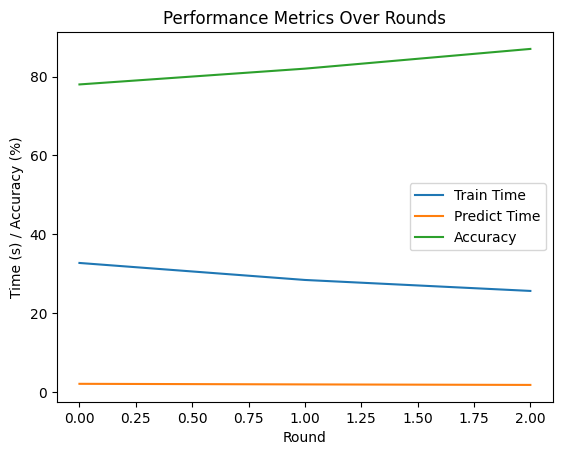

In [52]:

import matplotlib.pyplot as plt

# List of measurements
measurements = [{'round': 0, 'train': 32.76, 'predict': 2.13, 'accuracy': 0.78},
                {'round': 1, 'train': 28.45, 'predict': 1.98, 'accuracy': 0.82},
                {'round': 2, 'train': 25.67, 'predict': 1.85, 'accuracy': 0.87}]

# Multiply accuracy by 100 and round to 2 decimal places
for measurement in measurements:
    measurement['accuracy'] = round(measurement['accuracy'] * 100, 2)

# Extract data for plotting
rounds = [m['round'] for m in measurements]
train_times = [m['train'] for m in measurements]
predict_times = [m['predict'] for m in measurements]
accuracies = [m['accuracy'] for m in measurements]

# Plot lines on the same graph
plt.plot(rounds, train_times, label='Train Time')
plt.plot(rounds, predict_times, label='Predict Time')
plt.plot(rounds, accuracies, label='Accuracy')

# Add legend, axis labels, and title
plt.legend()
plt.xlabel('Round')
plt.ylabel('Time (s) / Accuracy (%)')
plt.title('Performance Metrics Over Rounds')

# Show the plot
plt.show()